In [ ]:
#1. Data Exploration and Preprocessing

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf11
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files #for uploading the file
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [4]:
df = pd.read_csv("Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [6]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
df.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [8]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#2. Model Implementation

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

In [11]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


array([[<Axes: title={'center': 'letter'}>,
        <Axes: title={'center': 'xbox'}>,
        <Axes: title={'center': 'ybox'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'xbar'}>,
        <Axes: title={'center': 'ybar'}>],
       [<Axes: title={'center': 'x2bar'}>,
        <Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybar'}>],
       [<Axes: title={'center': 'xy2bar'}>,
        <Axes: title={'center': 'xedge'}>,
        <Axes: title={'center': 'xedgey'}>,
        <Axes: title={'center': 'yedge'}>],
       [<Axes: title={'center': 'yedgex'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

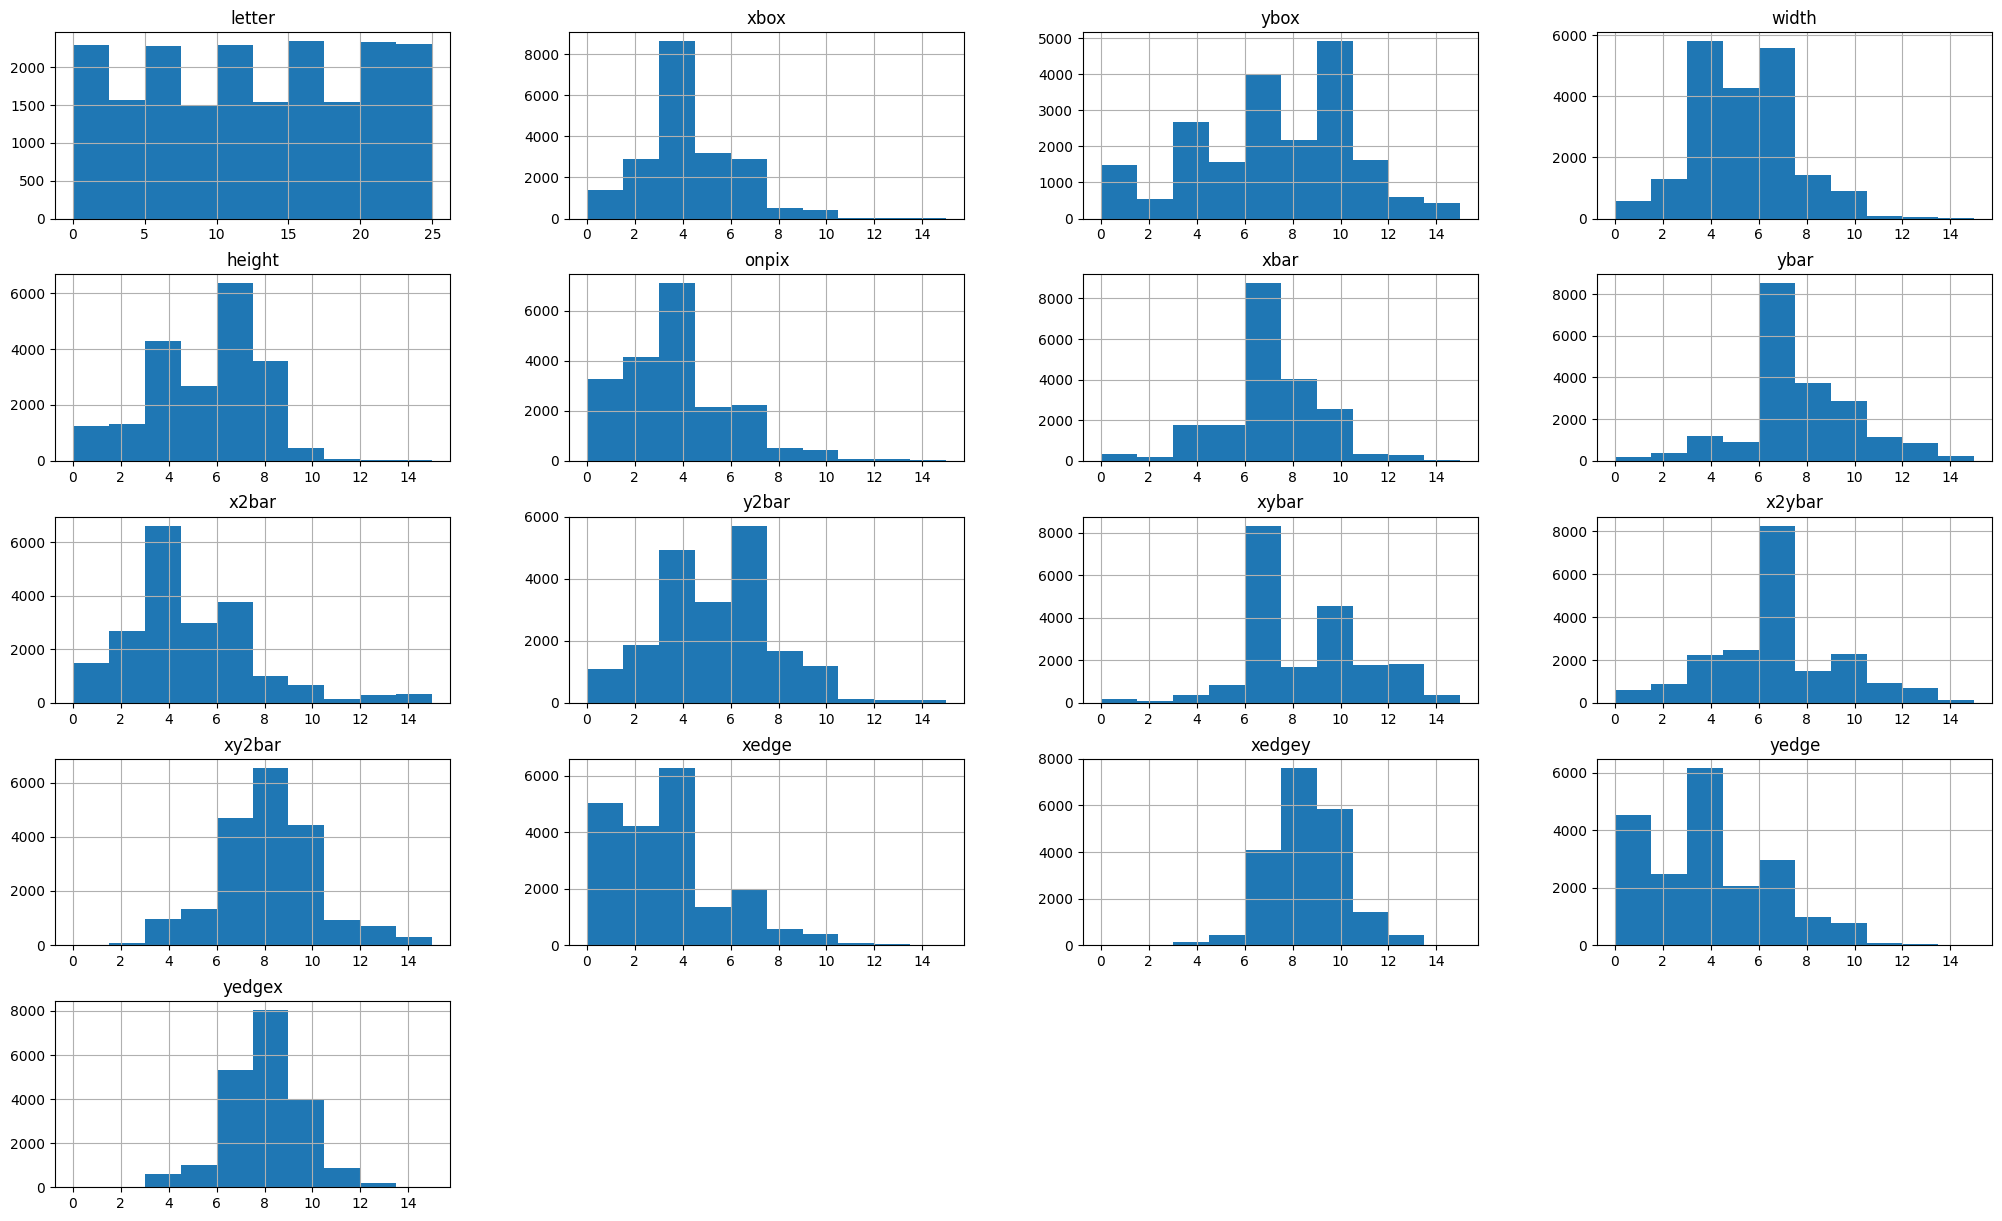

In [19]:
df.hist(figsize=(25,15))

<Axes: >

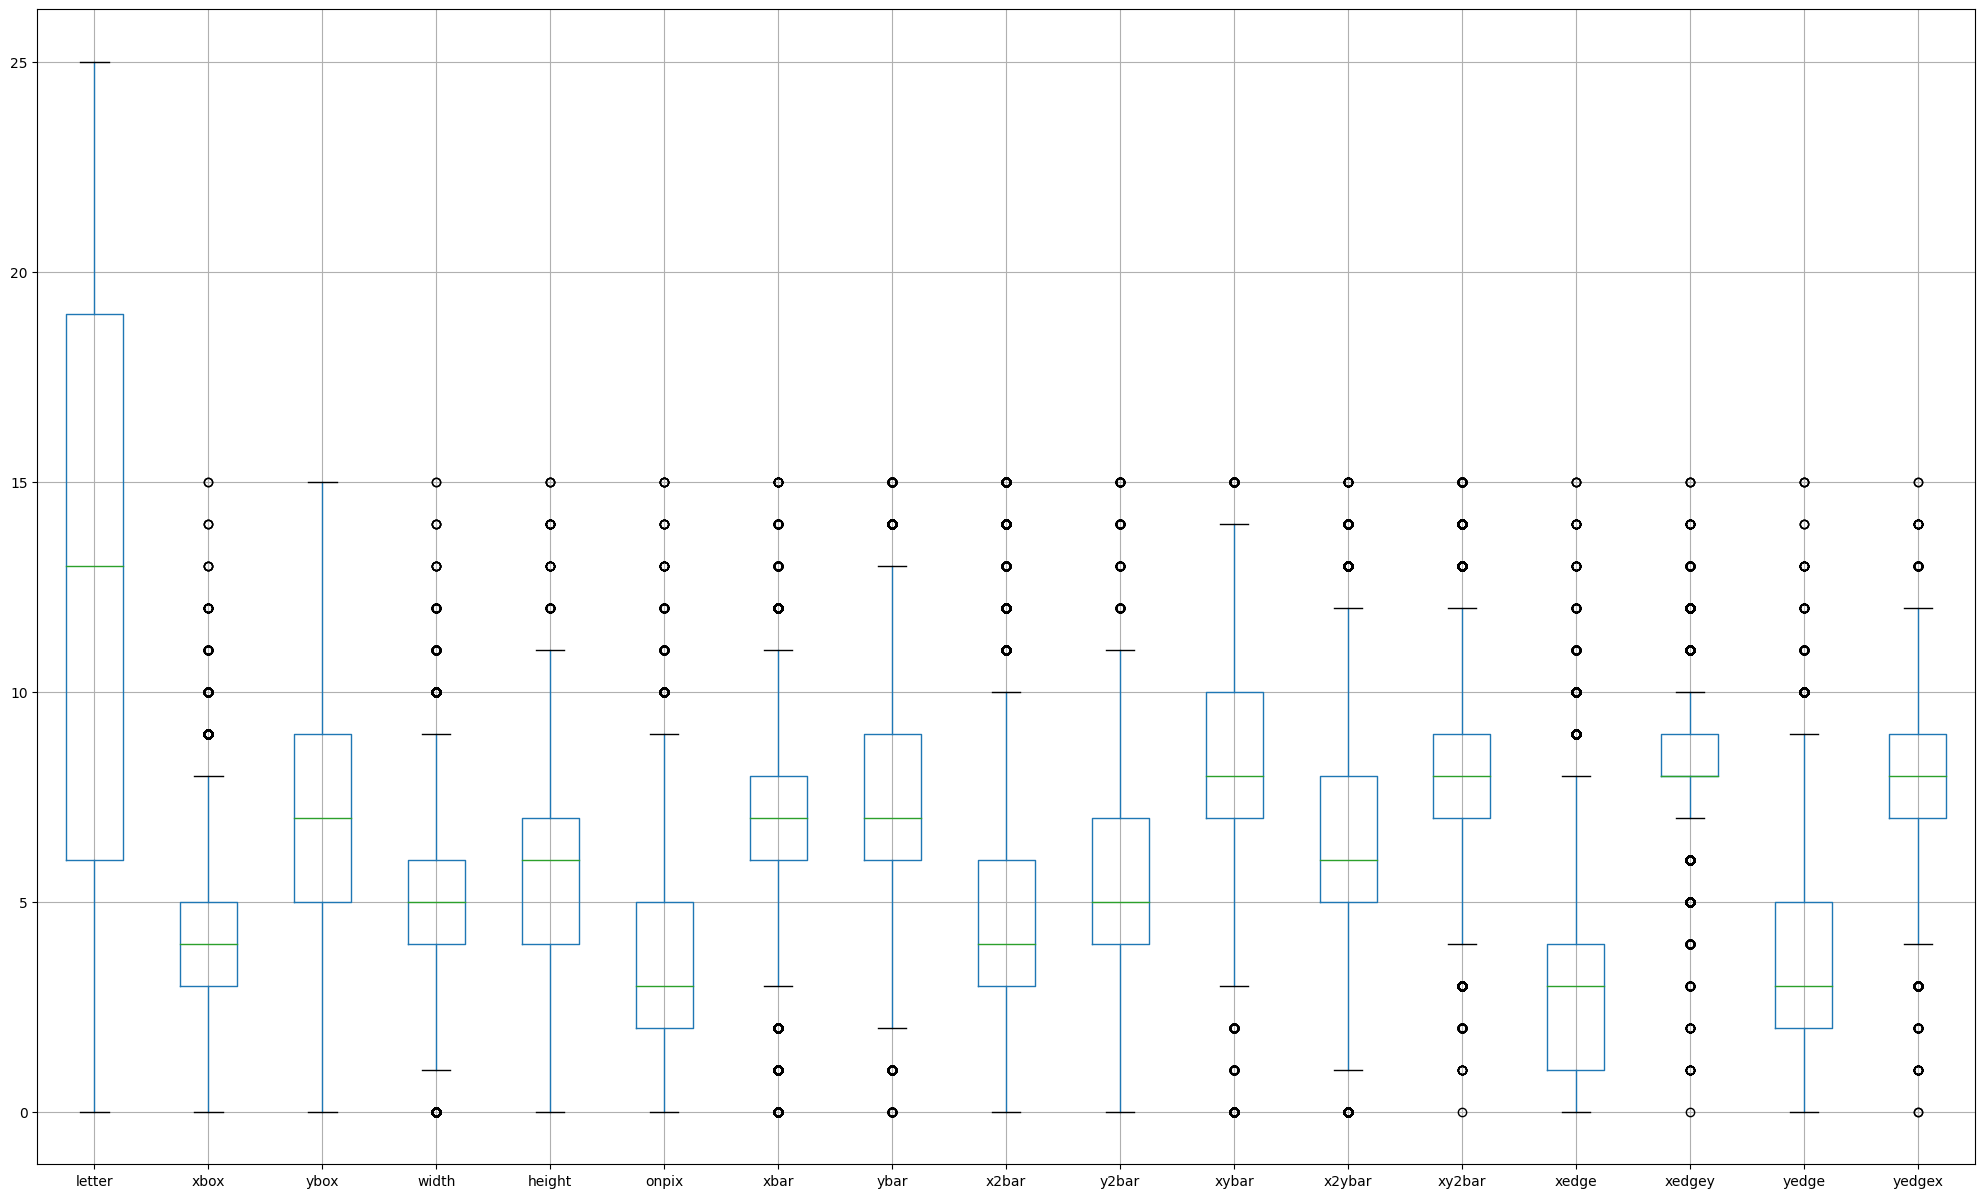

In [20]:
df.boxplot(figsize=(25,15))

In [21]:
df.corr()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.000000,0.105349,0.001547,0.096817,0.041672,-0.002665,-0.049637,0.308919,-0.109954,0.012275,-0.077303,0.389421,-0.140922,0.095885,0.336885,-0.056578,-0.183466
xbox,0.105349,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.001547,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.096817,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.041672,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,-0.002665,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.049637,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.308919,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,-0.109954,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.012275,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335


<Figure size 2500x1500 with 0 Axes>

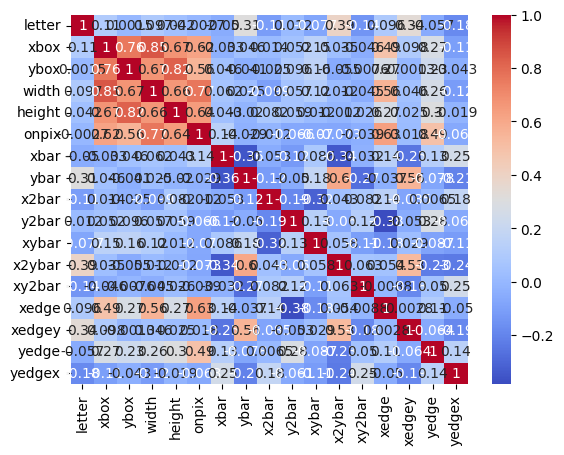

<Figure size 2500x1500 with 0 Axes>

In [28]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.figure(figsize=(25,15))

In [12]:
df.drop(columns=['letter'])

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [13]:
sc = StandardScaler()
x = df.drop(columns=['letter'])
y = df['letter']

In [14]:
x = sc.fit_transform(x)
x

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [16]:
xtrain

array([[-0.53500387,  0.29187713, -0.55688123, ..., -0.21908163,
         0.89919847,  0.12291107],
       [ 0.51038497,  1.19973756,  0.93230511, ..., -0.8656262 ,
         1.67831553,  0.12291107],
       [ 1.03307939,  0.89711742,  1.925096  , ..., -0.21908163,
         0.89919847, -0.49535386],
       ...,
       [ 1.55577381,  0.59449727,  0.43590966, ..., -0.21908163,
        -0.26947711, -2.35014863],
       [-0.53500387, -1.82646388, -0.55688123, ..., -2.15871536,
        -0.65903564,  0.12291107],
       [-0.01230945,  0.29187713, -0.06048579, ...,  1.07400752,
        -0.26947711, -1.73188371]])

In [ ]:
#Initialize model
ann = Sequential() #ann library

#Add hidden layer
ann.add(Dense(units=10,activation='relu')) #hidden layer activation we use relu activation function since we are dealing with binary classification

#Add output layer
ann.add(Dense(units=1, activation='sigmoid')) #There are always one o/p layer for the o/p layer there is sigmoid activation function

#Establish the connection between the layers
ann.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics='accuracy') #Here adadelta is gradient descent optimizer loss means error rate

#Fit the data
ann.fit(xtrain,ytrain, epochs=100) #epochs is responsible for backtracking and forward tracking

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: -8.2855 - accuracy: 0.0662
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: -8.4037 - accuracy: 0.0661
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: -8.5316 - accuracy: 0.0661
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: -8.6676 - accuracy: 0.0658
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: -8.8090 - accuracy: 0.0658
Epoch 6/100
500/500 [==============================] - 1s 1ms/step - loss: -8.9549 - accuracy: 0.0658
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: -9.1045 - accuracy: 0.0657
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: -9.2558 - accuracy: 0.0657
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: -9.4099 - accuracy: 0.0659
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: -9.566

In [ ]:
xtest

array([[-0.01230945, -0.31336316, -0.55688123, ..., -0.21908163,
        -0.26947711,  0.12291107],
       [-1.0576983 , -1.22122359, -1.54967212, ..., -0.21908163,
        -0.65903564, -0.49535386],
       [-0.53500387, -0.91860345, -0.55688123, ...,  1.7205521 ,
        -1.04859417,  0.12291107],
       ...,
       [ 4.16924591,  2.10759799,  2.42149144, ..., -0.8656262 ,
        -0.65903564, -0.49535386],
       [-0.01230945,  0.89711742,  0.93230511, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       [-1.0576983 , -0.6159833 , -0.55688123, ..., -2.15871536,
        -0.65903564,  0.12291107]])

In [ ]:
ypred = ann.predict(xtest)
ypred

125/125 [==============================] - 0s 1ms/step


array([[0.8846721 ],
       [0.85640895],
       [0.9404472 ],
       ...,
       [0.98392737],
       [0.4464966 ],
       [0.7046846 ]], dtype=float32)

In [ ]:
ytest

11456     3
16528     3
3253     21
18614     1
1544      7
         ..
6375     25
14837    18
3931     20
18266     0
12028     0
Name: letter, Length: 4000, dtype: int64

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.03      0.83      0.07       162
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00       139
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00       146
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00       141
          10       0.00      0.00      0.00       137
          11       0.00      0.00      0.00       139
          12       0.00      0.00      0.00       145
          13       0.00      0.00      0.00       161
          14       0.00      0.00      0.00       173
          15       0.00      0.00      0.00       174
          16       0.00      0.00      0.00       159
          17       0.00    

In [ ]:
ypred = ypred < 0.5
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
ytest

11456     3
16528     3
3253     21
18614     1
1544      7
         ..
6375     25
14837    18
3931     20
18266     0
12028     0
Name: letter, Length: 4000, dtype: int64

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.03      0.83      0.07       162
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00       139
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00       146
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00       141
          10       0.00      0.00      0.00       137
          11       0.00      0.00      0.00       139
          12       0.00      0.00      0.00       145
          13       0.00      0.00      0.00       161
          14       0.00      0.00      0.00       173
          15       0.00      0.00      0.00       174
          16       0.00      0.00      0.00       159
          17       0.00    

In [ ]:
#Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()

    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer

    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection

    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop']) #Here we select optimaizer
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [ ]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=3   #It will create three model for each optimizerr
)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest)) #Here validation means test data

Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 5/100
500/500 [==============================] - 5s 9ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0392 - val_loss: nan - val_accuracy: 0.0405
Epoch 8/100
500/500 [====================

In [ ]:
model.evaluate(xtrain,ytrain)

500/500 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0392


[nan, 0.03918749839067459]